In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import numpy as np
import datetime
from scipy import stats
from scipy.optimize import curve_fit
from scipy.interpolate import UnivariateSpline
import warnings
warnings.filterwarnings("ignore")

In [2]:
def summary_stats(_a, _b):
    '''Compute summary statistics for the difference between two sets.
    Input two flattened (1-D) arrays with NaN values removed'''
    
    # remove nan values
    a = _a[(np.isnan(_a)==False) & (np.isnan(_b)==False)]
    b = _b[(np.isnan(_a)==False) & (np.isnan(_b)==False)]
    
    if (len(a) == 0) or (len(b) == 0):
        diff = np.array([np.nan])
        slope, intercept, r_value, p_value, std_err = np.nan, np.nan, np.nan, np.nan, np.nan
    else:
        # for difference stats
        diff = b - a
        # for linear regression stats
        slope, intercept, r_value, p_value, std_err = stats.linregress(a, b)
    
    # populate dict with summary stats
    summary_stats_dict = {
        #'diff' : diff ,
        'min_diff' : np.nanmin( diff ),
        'max_diff' : np.nanmax( diff ),
        'range_diff' : np.nanmax( diff ) - np.nanmin( diff ),
        'n' : len(diff) ,
        'mean_diff' : np.nanmean( diff ),
        'median_diff' : np.nanmedian( diff ),
        'mean_squared_diff' : np.nanmean( diff**2 ),
        'rms_diff' : np.sqrt( np.nanmean( diff**2 ) ),
        'std_diff' : np.nanstd( diff ),
        'slope' : slope,
        'intercept' : intercept,
        'r_value' : r_value,
        'r_squared' : r_value**2,
        'p_value' : p_value,
        'std_err' : std_err
        }
    
    return summary_stats_dict 

In [3]:
### For 1 Jan 2021

#Read in GOES brightness temperatures

#df_merged = pd.read_csv(r'C:\Users\steve\OneDrive\Documents\School Stuff\UW\Mountain Hydrology Research Group\MountainGOES\Mountain GOES Paper\Paper 2 - satellite vs ground\GOES-16_ABI_data\merged_datasets.csv')
#df_merged.set_index(pd.to_datetime(df_merged.datetime), inplace=True)

#Read in phase angles

df16 = pd.read_csv(r'C:\Users\steve\git\subpixel-temp-separation\SnowT_multipixel_testGOES\goes-16_phase_angles_mar2020.csv')
df16.set_index(pd.to_datetime(df16.datetime_list), inplace=True)

df17 = pd.read_csv(r'C:\Users\steve\git\subpixel-temp-separation\SnowT_multipixel_testGOES\goes-17_phase_angles_mar2020.csv')
df17.set_index(pd.to_datetime(df17.datetime_list), inplace=True)

In [4]:
signed_phase_angles = [df16.iloc[0].phase_angle]

for i, this_phase_angle in enumerate(df16.iloc[1:].phase_angle):
    if df16.iloc[i].phase_angle > df16.iloc[i-1].phase_angle:
        signed_phase_angles.append(-1 * this_phase_angle)
    else:
        signed_phase_angles.append(this_phase_angle)
        
df16['signed_phase_angle'] = signed_phase_angles


signed_phase_angles = [df16.iloc[0].phase_angle]

for i, this_phase_angle in enumerate(df17.iloc[1:].phase_angle):
    if df17.iloc[i].phase_angle > df17.iloc[i-1].phase_angle:
        signed_phase_angles.append(-1 * this_phase_angle)
    else:
        signed_phase_angles.append(this_phase_angle)
        
df17['signed_phase_angle'] = signed_phase_angles

In [5]:
tcc20_mean_g16 = [0.19133497, 0.131049888, 0.271328671, 0.319058977, 0.317577706, 0.448319376]
tcc20_mean_g17 = [0.124487004, 0.164508393, 0.489817052, 0.526726313, 0.378679694, 0.357195391, 0.446153846]

In [6]:
path = r'C:\Users\steve\OneDrive\Documents\School Stuff\UW\Mountain Hydrology Research Group\MountainGOES\Mountain GOES Paper\Paper 2 - satellite vs ground\GOES-16_ABI_data\\'

In [7]:
# GOES-16 timeseries filepaths
pixelNW_g16_rad = pd.read_csv(path + 'pixelNW_GOES-16_ABI_2020_03_2-6_R.csv')
pixelA_g16_rad = pd.read_csv(path + 'pixelA_GOES-16_ABI_2020_03_2-6_R.csv')
pixelB_g16_rad = pd.read_csv(path + 'pixelB_GOES-16_ABI_2020_03_2-6_R.csv')
pixelC_g16_rad = pd.read_csv(path + 'pixelC_GOES-16_ABI_2020_03_2-6_R.csv')
pixelD_g16_rad = pd.read_csv(path + 'pixelD_GOES-16_ABI_2020_03_2-6_R.csv')
pixelE_g16_rad = pd.read_csv(path + 'pixelE_GOES-16_ABI_2020_03_2-6_R.csv')
# GOES-17 timeseries filepaths
pixelNW_g17_rad = pd.read_csv(path + 'pixelNW_GOES-17_ABI_2020_03_2-6_R.csv')
pixelA_g17_rad = pd.read_csv(path + 'pixelA_GOES-17_ABI_2020_03_2-6_R.csv')
pixelB_g17_rad = pd.read_csv(path + 'pixelB_GOES-17_ABI_2020_03_2-6_R.csv')
pixelC1_g17_rad = pd.read_csv(path + 'pixelC_GOES-17_ABI_2020_03_2-6_R.csv')
pixelC2_g17_rad = pd.read_csv(path + 'pixelC2_GOES-17_ABI_2020_03_2-6_R.csv')
pixelD_g17_rad = pd.read_csv(path + 'pixelD_GOES-17_ABI_2020_03_2-6_R.csv')
pixelE_g17_rad = pd.read_csv(path + 'pixelE_GOES-17_ABI_2020_03_2-6_R.csv')

In [8]:
df_list = [ pixelNW_g16_rad,
            pixelA_g16_rad, 
            pixelB_g16_rad, 
            pixelC_g16_rad, 
            pixelD_g16_rad, 
            pixelE_g16_rad, 
            pixelNW_g17_rad,
            pixelA_g17_rad, 
            pixelB_g17_rad, 
            pixelC1_g17_rad,
            pixelC2_g17_rad,
            pixelD_g17_rad, 
            pixelE_g17_rad]

for df in df_list:
    if 't' in df.columns:
        df['datetime'] = pd.to_datetime(df.t)
    elif 'time' in df.columns:
        df['datetime'] = pd.to_datetime(df.time)
    df.set_index('datetime', inplace=True)
    
for df in df_list:    
    for name in df.columns:
        if name not in ['x_2km','y_2km','b7_rad_2km','b7_tb_2km','b13_rad_2km','b13_tb_2km']:
            df.drop(labels=name, axis='columns', inplace=True)

GOES-East θ=0° occurs on March 4, at 16:56 UTC

GOES-West θ=0° occurs on March 3, at 21:34 UTC


at what phase angles is the sun above the horizon?

In [9]:
startdate = '2020-03-03 07'

sunset1 = '2020-03-03 01:09:00'

sunrise1 = '2020-03-03 13:42:00'

sunset2 = '2020-03-04 01:09:00'

sunrise2 = '2020-03-04 13:42:00'

enddate = '2020-03-04 04'


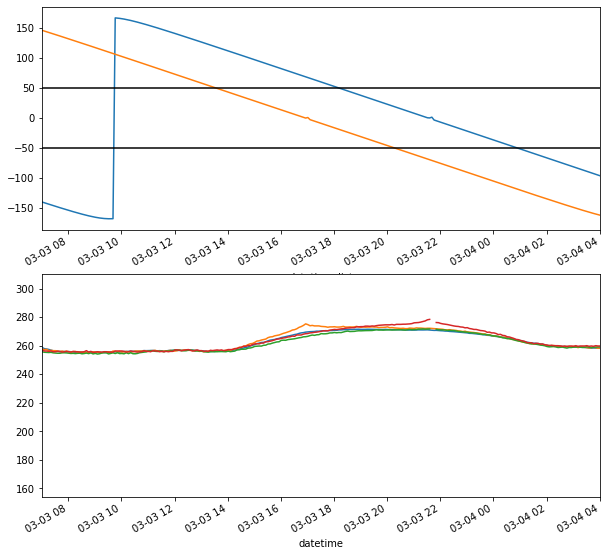

In [10]:
fig, [ax, axA] = plt.subplots(nrows=2, ncols=1, figsize=(10,10))
df17.signed_phase_angle.plot(ax=ax)
df16.signed_phase_angle.plot(ax=ax)

# GOES-16
pixelA_g16_rad.b13_tb_2km.plot(ax=axA)
pixelA_g16_rad.b7_tb_2km.plot(ax=axA)

# GOES-17
pixelA_g17_rad.b13_tb_2km.plot(ax=axA)
pixelA_g17_rad.b7_tb_2km.plot(ax=axA)

ax.set_xlim(startdate, enddate)
axA.set_xlim(startdate, enddate)

ax.axhline(50, c='k')
ax.axhline(-50, c='k')

In [11]:
pixelA_g17_rad

,x_2km,y_2km,b7_rad_2km,b7_tb_2km,b13_rad_2km,b13_tb_2km
datetime,,,,,,
2020-03-03 00:01:00,0.0,0.08624,0.247112,271.648346,54.785187,263.419037
2020-03-03 00:06:00,0.0,0.08624,0.222082,269.531433,52.315826,261.153656
2020-03-03 00:11:00,0.0,0.08624,0.203310,267.805481,49.160530,258.158295
2020-03-03 00:16:00,0.0,0.08624,0.189231,266.419189,50.989685,259.909058
2020-03-03 00:21:00,0.0,0.08624,0.201746,267.655579,52.910301,261.705109
...,...,...,...,...,...,...
2020-03-06 23:36:00,0.0,0.08624,0.290914,274.948029,62.376186,270.005859
2020-03-06 23:41:00,0.0,0.08624,0.287785,274.726929,62.330460,269.967743
2020-03-06 23:46:00,0.0,0.08624,0.281528,274.278473,62.924931,270.462158


In [12]:
pixelA_g17_rad = pixelA_g17_rad.dropna()
pixelA_g16_rad = pixelA_g16_rad.dropna()


df17 = df17.reindex(pixelA_g17_rad.index, axis=0)
df16 = df16.reindex(pixelA_g16_rad.index, axis=0)

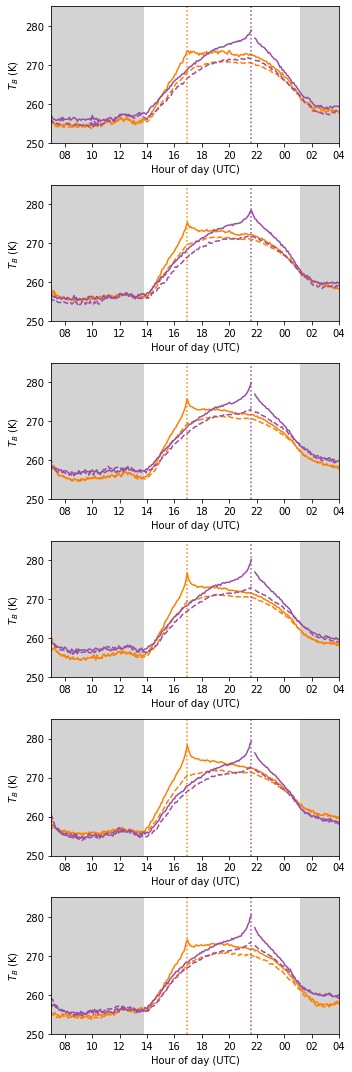

In [33]:
# plot timeseries for one pixel
fig, axs = plt.subplots(nrows=6, ncols= 1, figsize=(5,15), tight_layout=True)

[axNW, axA, axB, axC, axD, axE] = axs.ravel()

### Pixel NW

# GOES-16
pixelNW_g16_rad.b13_tb_2km.plot(ax=axNW, color='#ff7f00', linestyle='--')
pixelNW_g16_rad.b7_tb_2km.plot(ax=axNW, color='#ff7f00', linestyle='-')

# GOES-17
pixelNW_g17_rad.b13_tb_2km.plot(ax=axNW, color='#984ea3', linestyle='--')
pixelNW_g17_rad.b7_tb_2km.plot(ax=axNW, color='#984ea3', linestyle='-')


### Pixel A

# GOES-16
pixelA_g16_rad.b13_tb_2km.plot(ax=axA, color='#ff7f00', linestyle='--')
pixelA_g16_rad.b7_tb_2km.plot(ax=axA, color='#ff7f00', linestyle='-')

# GOES-17
pixelA_g17_rad.b13_tb_2km.plot(ax=axA, color='#984ea3', linestyle='--')
pixelA_g17_rad.b7_tb_2km.plot(ax=axA, color='#984ea3', linestyle='-')

### Pixel B

# GOES-16
pixelB_g16_rad.b13_tb_2km.plot(ax=axB, color='#ff7f00', linestyle='--')
pixelB_g16_rad.b7_tb_2km.plot(ax=axB, color='#ff7f00', linestyle='-')

# GOES-17
pixelB_g17_rad.b13_tb_2km.plot(ax=axB, color='#984ea3', linestyle='--')
pixelB_g17_rad.b7_tb_2km.plot(ax=axB, color='#984ea3', linestyle='-')

### Pixel C

# GOES-16
pixelC_g16_rad.b13_tb_2km.plot(ax=axC, color='#ff7f00', linestyle='--')
pixelC_g16_rad.b7_tb_2km.plot(ax=axC, color='#ff7f00', linestyle='-')

# GOES-17
pixelC1_g17_rad.b13_tb_2km.plot(ax=axC, color='#984ea3', linestyle='--')
pixelC1_g17_rad.b7_tb_2km.plot(ax=axC, color='#984ea3', linestyle='-')

### Pixel D

# GOES-16
pixelD_g16_rad.b13_tb_2km.plot(ax=axD, color='#ff7f00', linestyle='--')
pixelD_g16_rad.b7_tb_2km.plot(ax=axD, color='#ff7f00', linestyle='-')

# GOES-17
pixelD_g17_rad.b13_tb_2km.plot(ax=axD, color='#984ea3', linestyle='--')
pixelD_g17_rad.b7_tb_2km.plot(ax=axD, color='#984ea3', linestyle='-')

### Pixel E

# GOES-16
pixelE_g16_rad.b13_tb_2km.plot(ax=axE, color='#ff7f00', linestyle='--')
pixelE_g16_rad.b7_tb_2km.plot(ax=axE, color='#ff7f00', linestyle='-')

# GOES-17
pixelE_g17_rad.b13_tb_2km.plot(ax=axE, color='#984ea3', linestyle='--')
pixelE_g17_rad.b7_tb_2km.plot(ax=axE, color='#984ea3', linestyle='-')

# formatting
for this_ax in axs.ravel():
    # draw lines for times of minimum phase angles
    this_ax.axvline(pd.Timestamp('2020-03-03 16:56:00'), c='#ff7f00', linestyle=':') # time of GOES-East minimum phase angle (~8 deg)
    this_ax.axvline(pd.Timestamp('2020-03-03 21:34:00'), c='#984ea3', linestyle=':') # time of GOES-West minimum phase angle (~8 deg)
    # draw bands for nighttime (sunrise, sunset at 7:10 5:46 local time)
    this_ax.fill_between([sunset1, sunrise1], 0, 1000, color='lightgray', zorder=-999)
    this_ax.fill_between([sunset2, sunrise2], 0, 1000, color='lightgray', zorder=-999)
    this_ax.set_xlim(pd.Timestamp(startdate), pd.Timestamp(enddate))
    this_ax.set_ylim(250,285)
    this_ax.set_ylabel('$T_B$ (K)')
    this_ax.set_xlabel('Hour of day (UTC)')
    ## Text in the x-axis will be displayed in 'YYYY-mm' format.
    this_ax.xaxis.set_major_formatter(mdates.DateFormatter('%H'))
    # Rotates and right-aligns the x labels so they don't crowd each other.
    for label in this_ax.get_xticklabels(which='major'):
        label.set(rotation=0, horizontalalignment='center')
    #this_ax.legend(loc='lower left')

plt.savefig('mwir_tbtimeseries_mar2020.svg')

In [14]:
def mwir_tir_diff_plot(ax, df_rad,
                       startdate, enddate, sunrise1, sunset1, sunrise2, sunset2,
                       color):

    
    # segment data by day/night
    data_night1 = df_rad.b7_tb_2km[startdate:sunrise1] - df_rad.b13_tb_2km[startdate:sunrise1]
    data_day = df_rad.b7_tb_2km[sunrise1:sunset2] - df_rad.b13_tb_2km[sunrise1:sunset2]
    data_night2 = df_rad.b7_tb_2km[sunset2:enddate] - df_rad.b13_tb_2km[sunset2:enddate]

    # plot
    data_day.plot(ax=ax, linestyle='none', marker='.', color=color)
    data_night1.plot(ax=ax, linestyle='none', marker='x', color=color, alpha=0.5, markersize=5)
    data_night2.plot(ax=ax, linestyle='none', marker='x', color=color, alpha=0.5, markersize=5)

    return ax

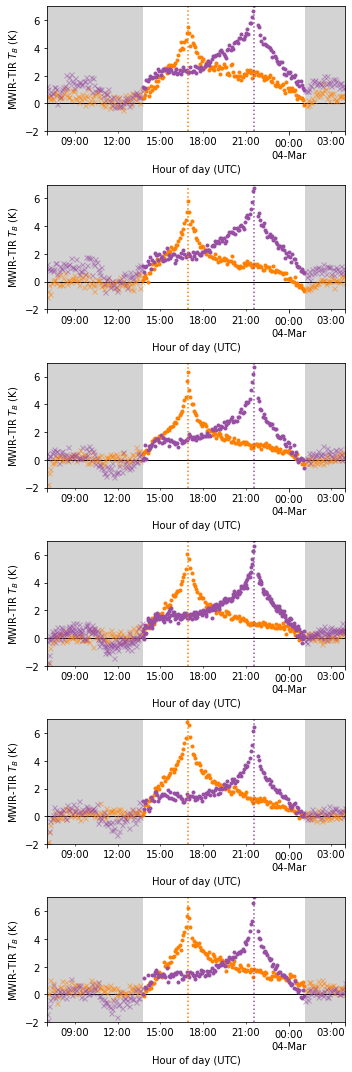

In [35]:
# plot timeseries for one pixel
fig, axs = plt.subplots(nrows=6, ncols= 1, figsize=(5,15), tight_layout=True)

[axNW, axA, axB, axC, axD, axE] = axs.ravel()

## Pixel NW
axNW = mwir_tir_diff_plot(axNW, pixelNW_g16_rad, startdate, enddate, sunrise1, sunset1, sunrise2, sunset2, '#ff7f00')
axNW = mwir_tir_diff_plot(axNW, pixelNW_g17_rad, startdate, enddate, sunrise1, sunset1, sunrise2, sunset2, '#984ea3')

### Pixel A
axA = mwir_tir_diff_plot(axA, pixelA_g16_rad, startdate, enddate, sunrise1, sunset1, sunrise2, sunset2, '#ff7f00')
axA = mwir_tir_diff_plot(axA, pixelA_g17_rad, startdate, enddate, sunrise1, sunset1, sunrise2, sunset2, '#984ea3')

### Pixel B
axB = mwir_tir_diff_plot(axB, pixelB_g16_rad, startdate, enddate, sunrise1, sunset1, sunrise2, sunset2, '#ff7f00')
axB = mwir_tir_diff_plot(axB, pixelB_g17_rad, startdate, enddate, sunrise1, sunset1, sunrise2, sunset2, '#984ea3')

### Pixel C
axC = mwir_tir_diff_plot(axC, pixelC_g16_rad, startdate, enddate, sunrise1, sunset1, sunrise2, sunset2, '#ff7f00')
axC = mwir_tir_diff_plot(axC, pixelC1_g17_rad, startdate, enddate, sunrise1, sunset1, sunrise2, sunset2, '#984ea3')
axC = mwir_tir_diff_plot(axC, pixelC2_g17_rad, startdate, enddate, sunrise1, sunset1, sunrise2, sunset2, '#984ea3')


### Pixel D
axD = mwir_tir_diff_plot(axD, pixelD_g16_rad, startdate, enddate, sunrise1, sunset1, sunrise2, sunset2, '#ff7f00')
axD = mwir_tir_diff_plot(axD, pixelD_g17_rad, startdate, enddate, sunrise1, sunset1, sunrise2, sunset2, '#984ea3')


### Pixel E
axE = mwir_tir_diff_plot(axE, pixelE_g16_rad, startdate, enddate, sunrise1, sunset1, sunrise2, sunset2, '#ff7f00')
axE = mwir_tir_diff_plot(axE, pixelE_g17_rad, startdate, enddate, sunrise1, sunset1, sunrise2, sunset2, '#984ea3')


# formatting
for this_ax in axs.ravel():
    # draw lines for times of minimum phase angles
    this_ax.axvline(pd.Timestamp('2020-03-03 16:56:00'), c='#ff7f00', linestyle=':') # time of GOES-East minimum phase angle (~8 deg)
    this_ax.axvline(pd.Timestamp('2020-03-03 21:34:00'), c='#984ea3', linestyle=':') # time of GOES-West minimum phase angle (~8 deg)
    # draw bands for nighttime (sunrise, sunset at 7:10 5:46 local time)
    this_ax.fill_between([sunset1, sunrise1], -100, 1000, color='lightgray', zorder=-999)
    this_ax.fill_between([sunset2, sunrise2], -100, 1000, color='lightgray', zorder=-999)
    #this_ax.text(pd.Timestamp('2020-02-11 07:00:00'), 4.5, 'night', color='#333333')
    this_ax.axhline(0, color='k', zorder=-1, lw=1)
    this_ax.set_xlim(pd.Timestamp(startdate), pd.Timestamp(enddate))
    this_ax.set_ylim(-2,7)
    this_ax.set_ylabel('MWIR-TIR $T_B$ (K)')
    this_ax.set_xlabel('Hour of day (UTC)')
    # Text in the x-axis will be displayed in 'YYYY-mm' format.
    #this_ax.xaxis.set_major_formatter(mdates.DateFormatter('%H'))
    # Rotates and right-aligns the x labels so they don't crowd each other.
    for label in this_ax.get_xticklabels(which='major'):
        label.set(rotation=0, horizontalalignment='center')
    #this_ax.legend(loc='lower right')
    
plt.savefig('mwir_deltatb_mar2020.svg')

In [16]:
#g16_range_diff = []
#g16_mean_diff = []
#g16_std_diff = []
#
#g17_range_diff = []
#g17_mean_diff = []
#g17_std_diff = []
#
## plot phase angle curves
#fig, axs = plt.subplots(nrows=6, ncols= 1, figsize=(5,15), tight_layout=True)
#
#[axNW, axA, axB, axC, axD, axE] = axs.ravel()
#
#diff = pixelNW_g16_rad.b7_tb_2km[df16.index][startdate:enddate] - pixelNW_g16_rad.b13_tb_2km[df16.index][startdate:enddate]
#axNW.plot(df16.signed_phase_angle[startdate:enddate], diff, '.', color='#ff7f00')
#g16_mean_diff.append(np.mean(diff))
#g16_std_diff.append(np.std(diff))
#g16_range_diff.append(np.max(diff) - np.min(diff))
#
#diff = pixelNW_g17_rad.b7_tb_2km[df17.index][startdate:enddate] - pixelNW_g17_rad.b13_tb_2km[df17.index][startdate:enddate]
#axNW.plot(df17.signed_phase_angle[startdate:enddate], diff, '.', color='#984ea3')
#g17_mean_diff.append(np.mean(diff))
#g17_std_diff.append(np.std(diff))
#g17_range_diff.append(np.max(diff) - np.min(diff))
#
#
#diff = pixelA_g16_rad.b7_tb_2km[df16.index][startdate:enddate] - pixelA_g16_rad.b13_tb_2km[df16.index][startdate:enddate]
#axA.plot(df16.signed_phase_angle[startdate:enddate], diff, '.', color='#ff7f00')
#g16_mean_diff.append(np.mean(diff))
#g16_std_diff.append(np.std(diff))
#g16_range_diff.append(np.max(diff) - np.min(diff))
#
#diff = pixelA_g17_rad.b7_tb_2km[df17.index][startdate:enddate] - pixelA_g17_rad.b13_tb_2km[df17.index][startdate:enddate]
#axA.plot(df17.signed_phase_angle[startdate:enddate], diff, '.', color='#984ea3')
#g17_mean_diff.append(np.mean(diff))
#g17_std_diff.append(np.std(diff))
#g17_range_diff.append(np.max(diff) - np.min(diff))
#
#
#diff = pixelB_g16_rad.b7_tb_2km[df16.index][startdate:enddate] - pixelB_g16_rad.b13_tb_2km[df16.index][startdate:enddate]
#axB.plot(df16.signed_phase_angle[startdate:enddate], diff, '.', color='#ff7f00')
#g16_mean_diff.append(np.mean(diff))
#g16_std_diff.append(np.std(diff))
#g16_range_diff.append(np.max(diff) - np.min(diff))
#
#diff = pixelB_g17_rad.b7_tb_2km[df17.index][startdate:enddate] - pixelB_g17_rad.b13_tb_2km[df17.index][startdate:enddate]
#axB.plot(df17.signed_phase_angle[startdate:enddate], diff, '.', color='#984ea3')
#g17_mean_diff.append(np.mean(diff))
#g17_std_diff.append(np.std(diff))
#g17_range_diff.append(np.max(diff) - np.min(diff))
#
#
#diff = pixelC_g16_rad.b7_tb_2km[df16.index][startdate:enddate] - pixelC_g16_rad.b13_tb_2km[df16.index][startdate:enddate]
#axC.plot(df16.signed_phase_angle[startdate:enddate], diff, '.', color='#ff7f00')
#g16_mean_diff.append(np.mean(diff))
#g16_std_diff.append(np.std(diff))
#g16_range_diff.append(np.max(diff) - np.min(diff))
#
#diff = pixelC1_g17_rad.b7_tb_2km[df17.index][startdate:enddate] - pixelC1_g17_rad.b13_tb_2km[df17.index][startdate:enddate]
#axC.plot(df17.signed_phase_angle[startdate:enddate], diff, '.', color='#984ea3')
#g17_mean_diff.append(np.mean(diff))
#g17_std_diff.append(np.std(diff))
#g17_range_diff.append(np.max(diff) - np.min(diff))
#
#
#diff = pixelC2_g17_rad.b7_tb_2km[df17.index][startdate:enddate] - pixelC2_g17_rad.b13_tb_2km[df17.index][startdate:enddate]
#axC.plot(df17.signed_phase_angle[startdate:enddate], diff, '.', color='#984ea3')
#g17_mean_diff.append(np.mean(diff))
#g17_std_diff.append(np.std(diff))
#g17_range_diff.append(np.max(diff) - np.min(diff))
#
#
#
#diff = pixelD_g16_rad.b7_tb_2km[df16.index][startdate:enddate] - pixelD_g16_rad.b13_tb_2km[df16.index][startdate:enddate]
#axD.plot(df16.signed_phase_angle[startdate:enddate], diff, '.', color='#ff7f00')
#g16_mean_diff.append(np.mean(diff))
#g16_std_diff.append(np.std(diff))
#g16_range_diff.append(np.max(diff) - np.min(diff))
#
#diff = pixelD_g17_rad.b7_tb_2km[df17.index][startdate:enddate] - pixelD_g17_rad.b13_tb_2km[df17.index][startdate:enddate]
#axD.plot(df17.signed_phase_angle[startdate:enddate], diff, '.', color='#984ea3')
#g17_mean_diff.append(np.mean(diff))
#g17_std_diff.append(np.std(diff))
#g17_range_diff.append(np.max(diff) - np.min(diff))
#
#
#diff = pixelE_g16_rad.b7_tb_2km[df16.index][startdate:enddate] - pixelE_g16_rad.b13_tb_2km[df16.index][startdate:enddate]
#axE.plot(df16.signed_phase_angle[startdate:enddate], diff, '.', color='#ff7f00')
#g16_mean_diff.append(np.mean(diff))
#g16_std_diff.append(np.std(diff))
#g16_range_diff.append(np.max(diff) - np.min(diff))
#
#diff = pixelE_g17_rad.b7_tb_2km[df17.index][startdate:enddate] - pixelE_g17_rad.b13_tb_2km[df17.index][startdate:enddate]
#axE.plot(df17.signed_phase_angle[startdate:enddate], diff, '.', color='#984ea3')
#g17_mean_diff.append(np.mean(diff))
#g17_std_diff.append(np.std(diff))
#g17_range_diff.append(np.max(diff) - np.min(diff))
#
#
#
#for ax in [axNW, axA, axB, axC, axD, axE]:
#    #ax.set_xlim(-50,50)
#    ax.set_ylim(0,7)
#    ax.set_ylabel('MWIR-TIR $T_B$ (K)')
#    ax.set_xlabel('phase angle, θ ($\degree$)')
#    ax.axvline(0, color='k', zorder=-999, lw=1)

In [17]:
#plt.plot(tcc20_mean_g16, g16_mean_diff,'+', c='#ff7f00')
#plt.plot(tcc20_mean_g17, g17_mean_diff,'x', c='#984ea3')
#plt.xlabel('fveg')
#plt.ylabel('mean diff');

In [18]:
#plt.plot(tcc20_mean_g16, g16_std_diff,'+', c='#ff7f00')
#plt.plot(tcc20_mean_g17, g17_std_diff,'x', c='#984ea3')
#plt.xlabel('fveg')
#plt.ylabel('std diff');

In [19]:
#plt.plot(tcc20_mean_g16, g16_range_diff,'+', c='#ff7f00')
#plt.plot(tcc20_mean_g17, g17_range_diff,'x', c='#984ea3')
#plt.xlabel('fveg')
#plt.ylabel('range diff');

---

In [20]:
def backscatter_function(phase_angles, e0, A, B, C, D):
    
    # half width, peak magnitude, shift up or down, symetrical linear, asymmetrical linear
    
    return A / (1+(abs(phase_angles))/e0) + B + C*phase_angles# + D*phase_angles**2

In [21]:
def fit_backscatter_function(xdata, ydata):

    parameters, covariance = curve_fit(backscatter_function, xdata, ydata, maxfev=10000)
    
    x_fit = np.arange(xdata.min(),xdata.max())
    y_fit = backscatter_function(x_fit, parameters[0], parameters[1], parameters[2], parameters[3], parameters[4])
    
    # find fwhm
    fit_max = y_fit.max()
    # create a spline of x and y_fit - half max
    spline = UnivariateSpline(x_fit, y_fit - (fit_max/2), s=0)
    fit_roots = spline.roots() # find the roots
    if len(fit_roots) == 1:
        fwhm = abs(fit_roots[0]*2)
    elif len(fit_roots) == 2:
        fwhm = fit_roots[1] - fit_roots[0]
    else:
        fwhm = np.nan
    
    rmse = np.sqrt(np.mean((backscatter_function(xdata, parameters[0], parameters[1], parameters[2], parameters[3], parameters[4]) - ydata)**2))
    print(fwhm)
    print(f'RMSE = {str(np.round(rmse,2))}')
    
    return x_fit, y_fit, fit_max, fwhm

In [22]:
def phase_angle_plot(ax, df_phase_angles, 
                     df_rad, 
                     fit_max, fwhm,
                     startdate, enddate, sunrise1, sunset1, sunrise2, sunset2,
                     color, max_phase_angle=None):

    
    # GOES-16
    xdata_night1 = df_phase_angles.signed_phase_angle[startdate:sunrise1]
    ydata_night1 = df_rad.b7_tb_2km[df_phase_angles.index][startdate:sunrise1] - df_rad.b13_tb_2km[df_phase_angles.index][startdate:sunrise1]
    xdata_day = df_phase_angles.signed_phase_angle[sunrise1:sunset2]
    ydata_day = df_rad.b7_tb_2km[df_phase_angles.index][sunrise1:sunset2] - df_rad.b13_tb_2km[df_phase_angles.index][sunrise1:sunset2]
    xdata_night2 = df_phase_angles.signed_phase_angle[sunset2:enddate]
    ydata_night2 = df_rad.b7_tb_2km[df_phase_angles.index][sunset2:enddate] - df_rad.b13_tb_2km[df_phase_angles.index][sunset2:enddate]

    # fit curve to GOES-16 daytime phase angles only
    if max_phase_angle == None:
        print(max_phase_angle)
        x_fit, y_fit, this_fit_max, this_fwhm = fit_backscatter_function(xdata_day, ydata_day)
    else:
        print(max_phase_angle)
        x_fit, y_fit, this_fit_max, this_fwhm = fit_backscatter_function(xdata_day[(xdata_day>-max_phase_angle) & (xdata_day<max_phase_angle)], ydata_day[(xdata_day>-max_phase_angle) & (xdata_day<max_phase_angle)])
    
    fit_max.append(this_fit_max)
    fwhm.append(this_fwhm)
    #ax.plot(x_fit,y_fit,'-', color='k', alpha=0.6, lw=1, zorder=9999)
    ax.plot(xdata_day, ydata_day, '.', color=color)
    ax.plot(xdata_night1, ydata_night1, 'x', color=color, alpha=0.5, markersize=5)
    ax.plot(xdata_night2, ydata_night2, 'x', color=color, alpha=0.5, markersize=5)
    #ax.text(xtext, ytext, f'max: {str(np.round(fit_max,1))}\nFWHM: {str(np.round(fwhm,1))}', color=color)

    return ax, fit_max, fwhm

In [23]:
df17 = df17.reindex(pixelA_g17_rad.index, axis=0)
df16 = df16.reindex(pixelA_g16_rad.index, axis=0)

NW
50
64.66152095577453
RMSE = 0.23
A
50
26.434762101563244
RMSE = 0.24
50
46.97091105549901
RMSE = 0.24
B
50
23.50079441666813
RMSE = 0.22
50
28.792666583930625
RMSE = 0.25
C
50
24.39227451623377
RMSE = 0.25
50
30.984087042897023
RMSE = 0.23
50
31.35687870927984
RMSE = 0.24
D
50
28.110197679380573
RMSE = 0.32
50
23.59078188944381
RMSE = 0.2
E
50
36.33343272571731
RMSE = 0.28
50
23.063934164486177
RMSE = 0.23


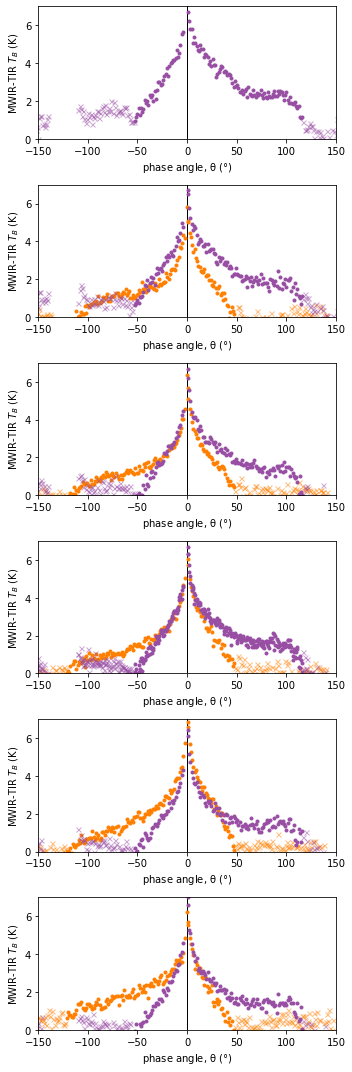

In [38]:
xtext, ytext = -45, 6
xtext2, ytext2 = 25, 6

g16_fit_max = []
g16_fwhm = []

g17_fit_max = []
g17_fwhm = []

max_phase_angle = 50

# plot phase angle curves
fig, axs = plt.subplots(nrows=6, ncols= 1, figsize=(5,15), tight_layout=True)

[axNW, axA, axB, axC, axD, axE] = axs.ravel()


print('NW')
#axNW, g16_fit_max, g16_fwhm = phase_angle_plot(axNW, df16, pixelNW_g16_rad, g16_fit_max, g16_fwhm,
#                     startdate, enddate, sunrise1, sunset1, sunrise1, sunset2,
#                     '#ff7f00', max_phase_angle)
axNW, g17_fit_max, g17_fwhm = phase_angle_plot(axNW, df17, pixelNW_g17_rad, g17_fit_max, g17_fwhm,
                     startdate, enddate, sunrise1, sunset1, sunrise1, sunset2,
                     '#984ea3', max_phase_angle)

print('A')
axA, g16_fit_max, g16_fwhm = phase_angle_plot(axA, df16, pixelA_g16_rad, g16_fit_max, g16_fwhm,
                     startdate, enddate, sunrise1, sunset1, sunrise1, sunset2,
                     '#ff7f00', max_phase_angle)
axA, g17_fit_max, g17_fwhm = phase_angle_plot(axA, df17, pixelA_g17_rad, g17_fit_max, g17_fwhm,
                     startdate, enddate, sunrise1, sunset1, sunrise1, sunset2,
                     '#984ea3', max_phase_angle)

print('B')
axB, g16_fit_max, g16_fwhm = phase_angle_plot(axB, df16, pixelB_g16_rad, g16_fit_max, g16_fwhm,
                     startdate, enddate, sunrise1, sunset1, sunrise1, sunset2,
                     '#ff7f00', max_phase_angle)
axB, g17_fit_max, g17_fwhm = phase_angle_plot(axB, df17, pixelB_g17_rad, g17_fit_max, g17_fwhm,
                     startdate, enddate, sunrise1, sunset1, sunrise1, sunset2,
                     '#984ea3', max_phase_angle)
print('C')
axC, g16_fit_max, g16_fwhm = phase_angle_plot(axC, df16, pixelC_g16_rad, g16_fit_max, g16_fwhm,
                     startdate, enddate, sunrise1, sunset1, sunrise1, sunset2,
                     '#ff7f00', max_phase_angle)
axC, g17_fit_max, g17_fwhm = phase_angle_plot(axC, df17, pixelC1_g17_rad, g17_fit_max, g17_fwhm,
                     startdate, enddate, sunrise1, sunset1, sunrise1, sunset2,
                     '#984ea3', max_phase_angle)
axC, g17_fit_max, g17_fwhm = phase_angle_plot(axC, df17, pixelC2_g17_rad, g17_fit_max, g17_fwhm,
                     startdate, enddate, sunrise1, sunset1, sunrise1, sunset2,
                     '#984ea3', max_phase_angle)
print('D')
axD, g16_fit_max, g16_fwhm = phase_angle_plot(axD, df16, pixelD_g16_rad, g16_fit_max, g16_fwhm,
                     startdate, enddate, sunrise1, sunset1, sunrise1, sunset2,
                     '#ff7f00', max_phase_angle)
axD, g17_fit_max, g17_fwhm = phase_angle_plot(axD, df17, pixelD_g17_rad, g17_fit_max, g17_fwhm,
                     startdate, enddate, sunrise1, sunset1, sunrise1, sunset2,
                     '#984ea3', max_phase_angle)
print('E')
axE, g16_fit_max, g16_fwhm = phase_angle_plot(axE, df16, pixelE_g16_rad, g16_fit_max, g16_fwhm,
                     startdate, enddate, sunrise1, sunset1, sunrise1, sunset2,
                     '#ff7f00', max_phase_angle)
axE, g17_fit_max, g17_fwhm = phase_angle_plot(axE, df17, pixelE_g17_rad, g17_fit_max, g17_fwhm,
                     startdate, enddate, sunrise1, sunset1, sunrise1, sunset2,
                     '#984ea3', max_phase_angle)

for ax in [axNW, axA, axB, axC, axD, axE]:
    ax.axvline(0, color='k', zorder=-999, lw=1)
    ax.set_xlim(-150,150)
    ax.set_ylim(0,7)
    ax.set_ylabel('MWIR-TIR $T_B$ (K)')
    ax.set_xlabel('phase angle, θ ($\degree$)')
    
plt.savefig('mwir_phaseangles_mar2020_v2.svg')

NW
50
46.596257574622676
RMSE = 0.28
50
64.66152095577453
RMSE = 0.23
A
50
26.434762101563244
RMSE = 0.24
50
46.97091105549901
RMSE = 0.24
B
50
23.50079441666813
RMSE = 0.22
50
28.792666583930625
RMSE = 0.25
C
50
24.39227451623377
RMSE = 0.25
50
30.984087042897023
RMSE = 0.23
50
31.35687870927984
RMSE = 0.24
D
50
28.110197679380573
RMSE = 0.32
50
23.59078188944381
RMSE = 0.2
E
50
36.33343272571731
RMSE = 0.28
50
23.063934164486177
RMSE = 0.23


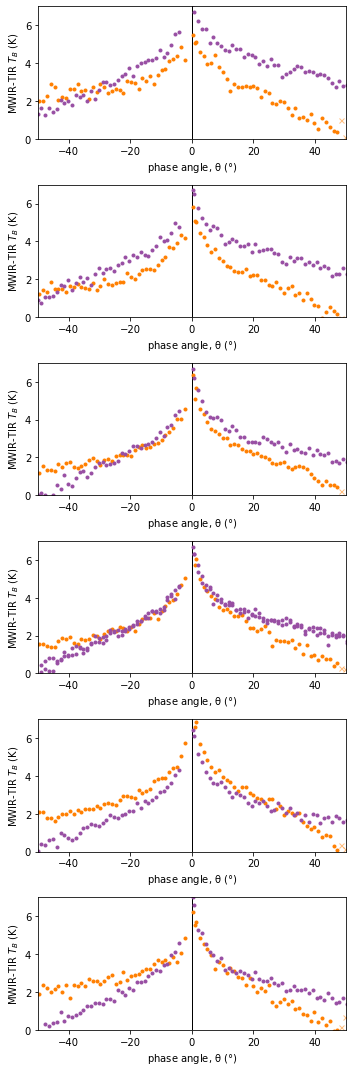

In [37]:
xtext, ytext = -45, 6
xtext2, ytext2 = 25, 6

g16_fit_max = []
g16_fwhm = []

g17_fit_max = []
g17_fwhm = []

max_phase_angle = 50

# plot phase angle curves
fig, axs = plt.subplots(nrows=6, ncols= 1, figsize=(5,15), tight_layout=True)

[axNW, axA, axB, axC, axD, axE] = axs.ravel()


print('NW')
axNW, g16_fit_max, g16_fwhm = phase_angle_plot(axNW, df16, pixelNW_g16_rad, g16_fit_max, g16_fwhm,
                     startdate, enddate, sunrise1, sunset1, sunrise1, sunset2,
                     '#ff7f00', max_phase_angle)
axNW, g17_fit_max, g17_fwhm = phase_angle_plot(axNW, df17, pixelNW_g17_rad, g17_fit_max, g17_fwhm,
                     startdate, enddate, sunrise1, sunset1, sunrise1, sunset2,
                     '#984ea3', max_phase_angle)

print('A')
axA, g16_fit_max, g16_fwhm = phase_angle_plot(axA, df16, pixelA_g16_rad, g16_fit_max, g16_fwhm,
                     startdate, enddate, sunrise1, sunset1, sunrise1, sunset2,
                     '#ff7f00', max_phase_angle)
axA, g17_fit_max, g17_fwhm = phase_angle_plot(axA, df17, pixelA_g17_rad, g17_fit_max, g17_fwhm,
                     startdate, enddate, sunrise1, sunset1, sunrise1, sunset2,
                     '#984ea3', max_phase_angle)

print('B')
axB, g16_fit_max, g16_fwhm = phase_angle_plot(axB, df16, pixelB_g16_rad, g16_fit_max, g16_fwhm,
                     startdate, enddate, sunrise1, sunset1, sunrise1, sunset2,
                     '#ff7f00', max_phase_angle)
axB, g17_fit_max, g17_fwhm = phase_angle_plot(axB, df17, pixelB_g17_rad, g17_fit_max, g17_fwhm,
                     startdate, enddate, sunrise1, sunset1, sunrise1, sunset2,
                     '#984ea3', max_phase_angle)
print('C')
axC, g16_fit_max, g16_fwhm = phase_angle_plot(axC, df16, pixelC_g16_rad, g16_fit_max, g16_fwhm,
                     startdate, enddate, sunrise1, sunset1, sunrise1, sunset2,
                     '#ff7f00', max_phase_angle)
axC, g17_fit_max, g17_fwhm = phase_angle_plot(axC, df17, pixelC1_g17_rad, g17_fit_max, g17_fwhm,
                     startdate, enddate, sunrise1, sunset1, sunrise1, sunset2,
                     '#984ea3', max_phase_angle)
axC, g17_fit_max, g17_fwhm = phase_angle_plot(axC, df17, pixelC2_g17_rad, g17_fit_max, g17_fwhm,
                     startdate, enddate, sunrise1, sunset1, sunrise1, sunset2,
                     '#984ea3', max_phase_angle)
print('D')
axD, g16_fit_max, g16_fwhm = phase_angle_plot(axD, df16, pixelD_g16_rad, g16_fit_max, g16_fwhm,
                     startdate, enddate, sunrise1, sunset1, sunrise1, sunset2,
                     '#ff7f00', max_phase_angle)
axD, g17_fit_max, g17_fwhm = phase_angle_plot(axD, df17, pixelD_g17_rad, g17_fit_max, g17_fwhm,
                     startdate, enddate, sunrise1, sunset1, sunrise1, sunset2,
                     '#984ea3', max_phase_angle)
print('E')
axE, g16_fit_max, g16_fwhm = phase_angle_plot(axE, df16, pixelE_g16_rad, g16_fit_max, g16_fwhm,
                     startdate, enddate, sunrise1, sunset1, sunrise1, sunset2,
                     '#ff7f00', max_phase_angle)
axE, g17_fit_max, g17_fwhm = phase_angle_plot(axE, df17, pixelE_g17_rad, g17_fit_max, g17_fwhm,
                     startdate, enddate, sunrise1, sunset1, sunrise1, sunset2,
                     '#984ea3', max_phase_angle)

for ax in [axNW, axA, axB, axC, axD, axE]:
    ax.axvline(0, color='k', zorder=-999, lw=1)
    ax.set_xlim(-50,50)
    ax.set_ylim(0,7)
    ax.set_ylabel('MWIR-TIR $T_B$ (K)')
    ax.set_xlabel('phase angle, θ ($\degree$)')
    
plt.savefig('mwir_phaseanglesZoom_mar2020.svg')

In [26]:
print(g16_fit_max)
print(g16_fwhm)
print(g17_fit_max)
print(g17_fwhm)

[5.1827801603243415, 5.31471962249128, 5.699599519722768, 6.256026506170715, 6.813287490800587, 5.502014860482632]
[46.596257574622676, 26.434762101563244, 23.50079441666813, 24.39227451623377, 28.110197679380573, 36.33343272571731]
[6.590402859632529, 6.195448840950956, 6.195557339524483, 6.3737928630630005, 6.1351224843578045, 6.18550102453597, 6.569306181439926]
[64.66152095577453, 46.97091105549901, 28.792666583930625, 30.984087042897023, 31.35687870927984, 23.59078188944381, 23.063934164486177]


In [27]:
print(np.mean(np.array(g16_fit_max)))
g16_fit_max

5.794738026665388


[5.1827801603243415,
 5.31471962249128,
 5.699599519722768,
 6.256026506170715,
 6.813287490800587,
 5.502014860482632]

In [28]:
print(np.mean(np.array(g17_fit_max)))
g17_fit_max

6.320733084786382


[6.590402859632529,
 6.195448840950956,
 6.195557339524483,
 6.3737928630630005,
 6.1351224843578045,
 6.18550102453597,
 6.569306181439926]

[2.1762621981099497, 5.185867165418521, 0.38615530627894035, 0.44955799257047113, 2.5992880767787665]
[-0.19247788865086843, 6.3891333387042035, -0.15627280742169658, 0.7379305748084102, 0.5440560059579639]


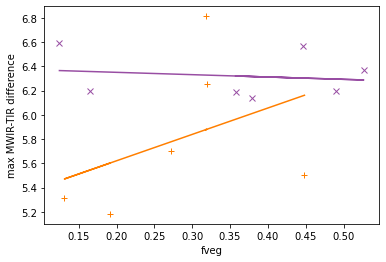

In [29]:
plt.plot(tcc20_mean_g16, g16_fit_max,'+', c='#ff7f00')

slope, intercept, r, p, se = stats.linregress(tcc20_mean_g16, g16_fit_max, alternative='two-sided')
print([slope, intercept, r, p, se])
plt.plot(tcc20_mean_g16, np.array(tcc20_mean_g16)*slope + intercept, c='#ff7f00')


plt.plot(tcc20_mean_g17, g17_fit_max,'x', c='#984ea3')

slope, intercept, r, p, se = stats.linregress(tcc20_mean_g17, g17_fit_max, alternative='two-sided')
print([slope, intercept, r, p, se])
plt.plot(tcc20_mean_g17, np.array(tcc20_mean_g17)*slope + intercept, c='#984ea3')

plt.xlabel('fveg')
plt.ylabel('max MWIR-TIR difference');

[-1.7416895070090397, 31.381906703556744, -0.021557961917107123, 0.9676680666096276, 40.38611686245403]
[-81.15216650802621, 64.4703268605191, -0.8404456683199827, 0.017887798240598815, 23.400291821973333]


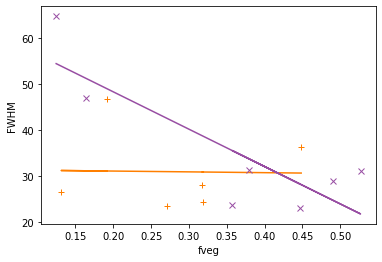

In [30]:
plt.plot(tcc20_mean_g16, g16_fwhm,'+', c='#ff7f00')

slope, intercept, r, p, se = stats.linregress(tcc20_mean_g16, g16_fwhm, alternative='two-sided')
print([slope, intercept, r, p, se])
plt.plot(tcc20_mean_g16, np.array(tcc20_mean_g16)*slope + intercept, c='#ff7f00')

plt.plot(tcc20_mean_g17, g17_fwhm,'x', c='#984ea3')

slope, intercept, r, p, se = stats.linregress(tcc20_mean_g17, g17_fwhm, alternative='two-sided')
print([slope, intercept, r, p, se])
plt.plot(tcc20_mean_g17, np.array(tcc20_mean_g17)*slope + intercept, c='#984ea3')

plt.xlabel('fveg')
plt.ylabel('FWHM');